In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
data=pd.read_csv('/content/smmh.csv')

In [3]:
data.head()

Timestamp  1. What is your age? 2. Gender 3. Relationship Status  \
0  4/18/2022 19:18:47                  21.0      Male      In a relationship   
1  4/18/2022 19:19:28                  21.0    Female                 Single   
2  4/18/2022 19:25:59                  21.0    Female                 Single   
3  4/18/2022 19:29:43                  21.0    Female                 Single   
4  4/18/2022 19:33:31                  21.0    Female                 Single   

  4. Occupation Status 5. What type of organizations are you affiliated with?  \
0   University Student                                         University       
1   University Student                                         University       
2   University Student                                         University       
3   University Student                                         University       
4   University Student                                         University       

  6. Do you use social media?  \
0                         Yes   
1                         Yes   
2                         Yes   
3                         Yes   
4                         Yes   

  7. What social media platforms do you commonly use?  \
0  Facebook, Twitter, Instagram, YouTube, Discord...    
1  Facebook, Twitter, Instagram, YouTube, Discord...    
2            Facebook, Instagram, YouTube, Pinterest    
3                                Facebook, Instagram    
4                       Facebook, Instagram, YouTube    

  8. What is the average time you spend on social media every day?  \
0                              Between 2 and 3 hours                 
1                                  More than 5 hours                 
2                              Between 3 and 4 hours                 
3                                  More than 5 hours                 
4                              Between 2 and 3 hours                 

   9. How often do you find yourself using Social media without a specific purpose?  \
0                                                  5                                  
1                                                  4                                  
2                                                  3                                  
3                                                  4                                  
4                                                  3                                  

   ...  11. Do you feel restless if you haven't used Social media in a while?  \
0  ...                                                  2                       
1  ...                                                  2                       
2  ...                                                  1                       
3  ...                                                  1                       
4  ...                                                  4                       

   12. On a scale of 1 to 5, how easily distracted are you?  \
0                                                  5          
1                                                  4          
2                                                  2          
3                                                  3          
4                                                  4          

   13. On a scale of 1 to 5, how much are you bothered by worries?  \
0                                                  2                 
1                                                  5                 
2                                                  5                 
3                                                  5                 
4                                                  5                 

   14. Do you find it difficult to concentrate on things?  \
0                                                  5        
1                                                  4        
2                                                  4        
3                          

In [4]:
data.tail()

Timestamp  1. What is your age? 2. Gender  \
476   5/21/2022 23:38:28                  24.0      Male   
477    5/22/2022 0:01:05                  26.0    Female   
478   5/22/2022 10:29:21                  29.0    Female   
479   7/14/2022 19:33:47                  21.0      Male   
480  11/12/2022 13:16:50                  53.0      Male   

    3. Relationship Status 4. Occupation Status  \
476                 Single      Salaried Worker   
477                Married      Salaried Worker   
478                Married      Salaried Worker   
479                 Single   University Student   
480                Married      Salaried Worker   

    5. What type of organizations are you affiliated with?  \
476                                University, Private       
477                                         University       
478                                         University       
479                                         University       
480                                            Private       

    6. Do you use social media?  \
476                         Yes   
477                         Yes   
478                         Yes   
479                         Yes   
480                         Yes   

    7. What social media platforms do you commonly use?  \
476                       Facebook, Instagram, YouTube    
477                                  Facebook, YouTube    
478                                  Facebook, YouTube    
479  Facebook, Twitter, Instagram, YouTube, Discord...    
480                                  Facebook, YouTube    

    8. What is the average time you spend on social media every day?  \
476                              Between 2 and 3 hours                 
477                              Between 1 and 2 hours                 
478                              Between 2 and 3 hours                 
479                              Between 2 and 3 hours                 
480                                  Less than an Hour                 

     9. How often do you find yourself using Social media without a specific purpose?  \
476                                                  3                                  
477                                                  2                                  
478                                                  3                                  
479                                                  2                                  
480                                                  2                                  

     ...  \
476  ...   
477  ...   
478  ...   
479  ...   
480  ...   

     11. Do you feel restless if you haven't used Social media in a while?  \
476                                                  3                       
477                                                  2                       
478                                                  4                       
479                                                  2                       
480                                                  1                       

     12. On a scale of 1 to 5, how easily distracted are you?  \
476                                                  4          
477                                                  3          
478                                                  3          
479                                                  3          
480                                                  3          

     13. On a scale of 1 to 5, how much are you bothered by worries?  \
476                                                  3                 
477                                                  4                 
478                                                  2                 
479                                                  3                 
480                                                  1                 

     14. Do you find it difficult to concentrate on things?  \
476        

In [5]:
data.shape

(481, 21)

Data Pre-processing and Cleaning

In [6]:
data.rename(columns = {'1. What is your age?':'Age','2. Gender':'Sex','3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User?',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Time Spent',
                       '9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
                       '14. Do you find it difficult to concentrate on things?':'ADHD Q4',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self Esteem Q2',
                       '17. How often do you look to seek validation from features of social media?':'Self Esteem Q3',
                       '18. How often do you feel depressed or down?':'Depression Q1',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3' },inplace=True)

In [7]:
title= list(data.columns)
title

['Timestamp',
 'Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'ADHD Q1',
 'ADHD Q2',
 'Anxiety Q1',
 'ADHD Q3',
 'Anxiety Q2',
 'ADHD Q4',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [8]:
title[11], title[12] = title[12], title[11]
title[12], title[14] = title[14], title[12]
title[13], title[14] = title[14], title[13]
data = data[title]
title

['Timestamp',
 'Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'ADHD Q1',
 'ADHD Q2',
 'ADHD Q3',
 'ADHD Q4',
 'Anxiety Q1',
 'Anxiety Q2',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            481 non-null    object 
 1   Age                  481 non-null    float64
 2   Sex                  481 non-null    object 
 3   Relationship Status  481 non-null    object 
 4   Occupation           481 non-null    object 
 5   Affiliations         451 non-null    object 
 6   Social Media User?   481 non-null    object 
 7   Platforms Used       481 non-null    object 
 8   Time Spent           481 non-null    object 
 9   ADHD Q1              481 non-null    int64  
 10  ADHD Q2              481 non-null    int64  
 11  ADHD Q3              481 non-null    int64  
 12  ADHD Q4              481 non-null    int64  
 13  Anxiety Q1           481 non-null    int64  
 14  Anxiety Q2           481 non-null    int64  
 15  Self Esteem Q1       481 non-null    int

**Missing Value Detection**

In [10]:
data.isnull()

Timestamp    Age    Sex  Relationship Status  Occupation  Affiliations  \
0        False  False  False                False       False         False   
1        False  False  False                False       False         False   
2        False  False  False                False       False         False   
3        False  False  False                False       False         False   
4        False  False  False                False       False         False   
..         ...    ...    ...                  ...         ...           ...   
476      False  False  False                False       False         False   
477      False  False  False                False       False         False   
478      False  False  False                False       False         False   
479      False  False  False                False       False         False   
480      False  False  False                False       False         False   

     Social Media User?  Platforms Used  Time Spent  ADHD Q1  ...  ADHD Q3  \
0                 False           False       False    False  ...    False   
1                 False           False       False    False  ...    False   
2                 False           False       False    False  ...    False   
3                 False           False       False    False  ...    False   
4                 False           False       False    False  ...    False   
..                  ...             ...         ...      ...  ...      ...   
476               False           False       False    False  ...    False   
477               False           False       False    False  ...    False   
478               False           False       False    False  ...    False   
479               False           False       False    False  ...    False   
480               False           False       False    False  ...    False   

     ADHD Q4  Anxiety Q1  Anxiety Q2  Self Esteem Q1  Self Esteem Q2  \
0      False       False       False           False           False   
1      False       False       False           False           False   
2      False       False       False           False           False   
3      False       False       False           False           False   
4      False       False       False           False           False   
..       ...         ...         ...             ...             ...   
476    False       False       False           False           False   
477    False       False       False           False           False   
478    False       False       False           False           False   
479    False       False       False           False           False   
480    False       False       False           False           False   

     Self Esteem Q3  Depression Q1  Depression Q2  Depression Q3  
0             False          False          False          False  
1             False          False          False          False  
2             False          False          False          False  
3             False          False          False          False  
4             False          False          False          False  
..              ...            ...            ...            ...  
476           False          False          False          False  
477           False          False          False          False  
478           False          False          False          False  
479           False          False          False          False  
480           False          False          False          False  

[481 rows x 21 columns]

In [11]:
data.isnull().sum()

Timestamp               0
Age                     0
Sex                     0
Relationship Status     0
Occupation              0
Affiliations           30
Social Media User?      0
Platforms Used          0
Time Spent              0
ADHD Q1                 0
ADHD Q2                 0
ADHD Q3                 0
ADHD Q4                 0
Anxiety Q1              0
Anxiety Q2              0
Self Esteem Q1          0
Self Esteem Q2          0
Self Esteem Q3          0
Depression Q1           0
Depression Q2           0
Depression Q3           0
dtype: int64

In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            481 non-null    object 
 1   Age                  481 non-null    float64
 2   Sex                  481 non-null    object 
 3   Relationship Status  481 non-null    object 
 4   Occupation           481 non-null    object 
 5   Affiliations         451 non-null    object 
 6   Social Media User?   481 non-null    object 
 7   Platforms Used       481 non-null    object 
 8   Time Spent           481 non-null    object 
 9   ADHD Q1              481 non-null    int64  
 10  ADHD Q2              481 non-null    int64  
 11  ADHD Q3              481 non-null    int64  
 12  ADHD Q4              481 non-null    int64  
 13  Anxiety Q1           481 non-null    int64  
 14  Anxiety Q2           481 non-null    int64  
 15  Self Esteem Q1       481 non-null    int

**GENDER**

In [13]:
Genders = set(data['Sex'])
print(Genders)

{'unsure ', 'Male', 'Nonbinary ', 'Female', 'Non-binary', 'There are others???', 'Trans', 'Non binary ', 'NB'}


In [14]:
data.drop(data.loc[data['Sex']== 'There are others???'].index,inplace=True)

In [15]:
data.replace('Non-binary','Others', inplace=True)
data.replace('Nonbinary ','Others', inplace=True)
data.replace('NB','Others', inplace=True)
data.replace('unsure ','Others', inplace=True)
data.replace('Non binary ','Others', inplace=True)
data.replace('Trans','Others', inplace=True)

In [16]:
Genders = set(data['Sex'])
print(Genders)

{'Others', 'Male', 'Female'}


**Age**

In [17]:
data.loc[382,'Age']

26.7

In [18]:
data['Age'] = data['Age'].astype('int64')

In [19]:
data.describe()


Age     ADHD Q1     ADHD Q2     ADHD Q3     ADHD Q4  Anxiety Q1  \
count  480.000000  480.000000  480.000000  480.000000  480.000000  480.000000   
mean    26.143750    3.552083    3.316667    3.345833    3.245833    2.583333   
std      9.923621    1.097252    1.327300    1.174353    1.348464    1.253527   
min     13.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%     21.000000    3.000000    2.000000    3.000000    2.000000    2.000000   
50%     22.000000    4.000000    3.000000    3.000000    3.000000    2.000000   
75%     26.000000    4.000000    4.000000    4.000000    4.000000    3.000000   
max     91.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

       Anxiety Q2  Self Esteem Q1  Self Esteem Q2  Self Esteem Q3  \
count  480.000000      480.000000      480.000000      480.000000   
mean     3.564583        2.831250        2.772917        2.456250   
std      1.279351        1.409283        1.056097        1.248867   
min      1.000000        1.000000        1.000000        1.000000   
25%      3.000000        2.000000        2.000000        1.000000   
50%      4.000000        3.000000        3.000000        2.000000   
75%      5.000000        4.000000        3.000000        3.000000   
max      5.000000        5.000000        5.000000        5.000000   

       Depression Q1  Depression Q2  Depression Q3  
count     480.000000     480.000000     480.000000  
mean        3.260417       3.172917       3.206250  
std         1.310347       1.256838       1.459675  
min         1.000000       1.000000       1.000000  
25%         2.000000       2.000000       2.000000  
50%         3.000000       3.000000       3.000000  
75%         4.000000       4.000000       5.000000  
max         5.000000       5.000000       5.000000

In [20]:
data.median(numeric_only=True)


Age               22.0
ADHD Q1            4.0
ADHD Q2            3.0
ADHD Q3            3.0
ADHD Q4            3.0
Anxiety Q1         2.0
Anxiety Q2         4.0
Self Esteem Q1     3.0
Self Esteem Q2     3.0
Self Esteem Q3     2.0
Depression Q1      3.0
Depression Q2      3.0
Depression Q3      3.0
dtype: float64

In [21]:
data.loc[data['Self Esteem Q2'] == 3, 'Self Esteem Q2'] = 0
data.loc[data['Self Esteem Q2'] == 4, 'Self Esteem Q2'] = 0
data.loc[data['Self Esteem Q2'] == 5, 'Self Esteem Q2'] = 0
#Setting scores of '1' to '4' and '2' to '2'.
data.loc[data['Self Esteem Q2'] == 1, 'Self Esteem Q2'] = 4
data.loc[data['Self Esteem Q2'] == 2, 'Self Esteem Q2'] = 2

In [22]:
data.head(5)


Timestamp  Age     Sex Relationship Status          Occupation  \
0  4/18/2022 19:18:47   21    Male   In a relationship  University Student   
1  4/18/2022 19:19:28   21  Female              Single  University Student   
2  4/18/2022 19:25:59   21  Female              Single  University Student   
3  4/18/2022 19:29:43   21  Female              Single  University Student   
4  4/18/2022 19:33:31   21  Female              Single  University Student   

  Affiliations Social Media User?  \
0   University                Yes   
1   University                Yes   
2   University                Yes   
3   University                Yes   
4   University                Yes   

                                      Platforms Used             Time Spent  \
0  Facebook, Twitter, Instagram, YouTube, Discord...  Between 2 and 3 hours   
1  Facebook, Twitter, Instagram, YouTube, Discord...      More than 5 hours   
2            Facebook, Instagram, YouTube, Pinterest  Between 3 and 4 hours   
3                                Facebook, Instagram      More than 5 hours   
4                       Facebook, Instagram, YouTube  Between 2 and 3 hours   

   ADHD Q1  ...  ADHD Q3  ADHD Q4  Anxiety Q1  Anxiety Q2  Self Esteem Q1  \
0        5  ...        5        5           2           2               2   
1        4  ...        4        4           2           5               5   
2        3  ...        2        4           1           5               3   
3        4  ...        3        3           1           5               5   
4        3  ...        4        5           4           5               3   

   Self Esteem Q2  Self Esteem Q3  Depression Q1  Depression Q2  Depression Q3  
0               0               2              5              4              5  
1               4               1              5              4              5  
2               0               1              4              2              5  
3               4               2              4              3              2  
4               0               3              4              4              1  

[5 rows x 21 columns]

In [23]:
ADHD = ['ADHD Q1', 'ADHD Q2', 'ADHD Q3', 'ADHD Q4']
data['ADHD Score'] = data[ADHD].sum(axis=1)

Anxiety = ['Anxiety Q1', 'Anxiety Q2']
data['Anxiety Score'] = data[Anxiety].sum(axis=1)

SelfEsteem = ['Self Esteem Q1', 'Self Esteem Q2','Self Esteem Q3']
data['Self Esteem Score'] = data[SelfEsteem].sum(axis=1)

Depression = ['Depression Q1', 'Depression Q2','Depression Q3']
data['Depression Score'] = data[Depression].sum(axis=1)

Total = ['ADHD Score', 'Anxiety Score','Self Esteem Score','Depression Score']
data['Total Score'] = data[Total].sum(axis=1)

#Deleting question columns and timestamp columns as they are no longer used
data.drop(data.iloc[:, 9:21], inplace = True, axis = 1)
data.drop(['Timestamp'], inplace = True, axis = 1)

In [24]:
data.head(5)


Age     Sex Relationship Status          Occupation Affiliations  \
0   21    Male   In a relationship  University Student   University   
1   21  Female              Single  University Student   University   
2   21  Female              Single  University Student   University   
3   21  Female              Single  University Student   University   
4   21  Female              Single  University Student   University   

  Social Media User?                                     Platforms Used  \
0                Yes  Facebook, Twitter, Instagram, YouTube, Discord...   
1                Yes  Facebook, Twitter, Instagram, YouTube, Discord...   
2                Yes            Facebook, Instagram, YouTube, Pinterest   
3                Yes                                Facebook, Instagram   
4                Yes                       Facebook, Instagram, YouTube   

              Time Spent  ADHD Score  Anxiety Score  Self Esteem Score  \
0  Between 2 and 3 hours          18              4                  4   
1      More than 5 hours          15              7                 10   
2  Between 3 and 4 hours          11              6                  4   
3      More than 5 hours          12              6                 11   
4  Between 2 and 3 hours          17              9                  6   

   Depression Score  Total Score  
0                14           40  
1                14           46  
2                11           32  
3                 9           38  
4                 9           41

In [25]:
def map_score(score):
  if score < 40:
    return "0"
  elif score >= 40:
    return "1"

data['Outcome']= data['Total Score'].apply(lambda score: map_score(score))
data['Outcome'] = data['Outcome'].astype('int64')

In [26]:
data.shape


(480, 14)

In [27]:
data.describe()


Age  ADHD Score  Anxiety Score  Self Esteem Score  \
count  480.000000  480.000000     480.000000         480.000000   
mean    26.143750   13.460417       6.147917           6.266667   
std      9.923621    3.898302       2.087090           2.759635   
min     13.000000    4.000000       2.000000           2.000000   
25%     21.000000   11.000000       5.000000           4.000000   
50%     22.000000   14.000000       6.000000           6.000000   
75%     26.000000   16.000000       8.000000           8.000000   
max     91.000000   20.000000      10.000000          14.000000   

       Depression Score  Total Score     Outcome  
count        480.000000   480.000000  480.000000  
mean           9.639583    35.514583    0.370833  
std            3.104528     9.274507    0.483532  
min            3.000000    14.000000    0.000000  
25%            7.750000    29.000000    0.000000  
50%           10.000000    36.000000    0.000000  
75%           12.000000    42.000000    1.000000  
max           15.000000    58.000000    1.000000

**Data Visualisation**

In [28]:
data['Sex'].value_counts()


Female    263
Male      211
Others      6
Name: Sex, dtype: int64

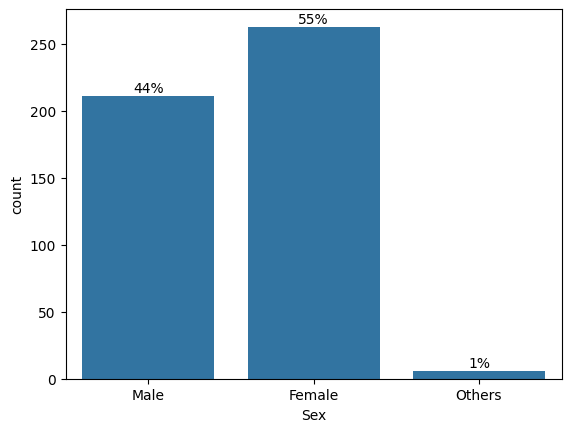

In [29]:
total=float(len(data))
ax = sns.countplot(x="Sex", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height + 3,'{0:.0%}'.format(height/total),ha="center")

In [30]:
data['Outcome'].value_counts()


0    302
1    178
Name: Outcome, dtype: int64

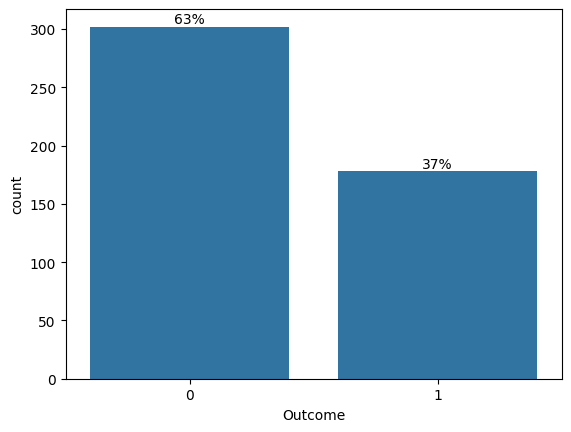

In [31]:
total=float(len(data))
ax = sns.countplot(x="Outcome", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height + 3,'{0:.0%}'.format(height/total),ha="center")

In [32]:
data['Occupation'].value_counts()

University Student    292
Salaried Worker       131
School Student         49
Retired                 8
Name: Occupation, dtype: int64

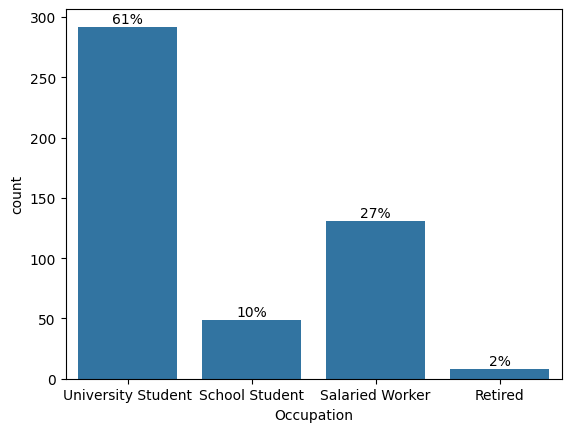

In [33]:
total=float(len(data))
ax = sns.countplot(x="Occupation", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height + 3,'{0:.0%}'.format(height/total),ha="center")

<Axes: xlabel='Time Spent on Social Media', ylabel='Frequency'>

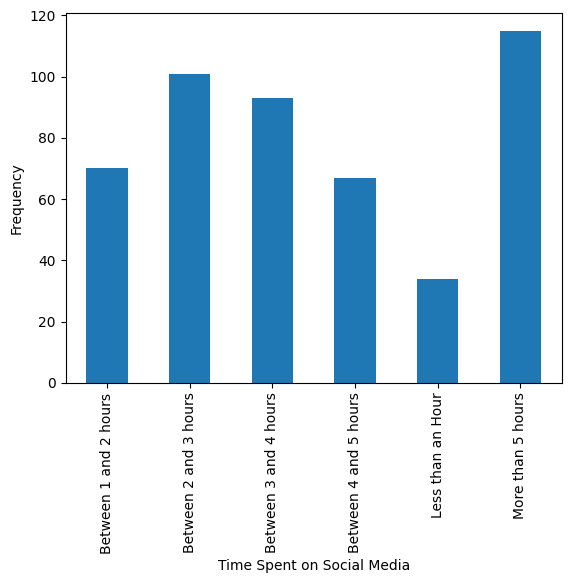

In [34]:
data.groupby('Time Spent').size().plot.bar(xlabel='Time Spent on Social Media', ylabel='Frequency')

<Axes: xlabel='Time Spent', ylabel='Mean ADHD Score'>

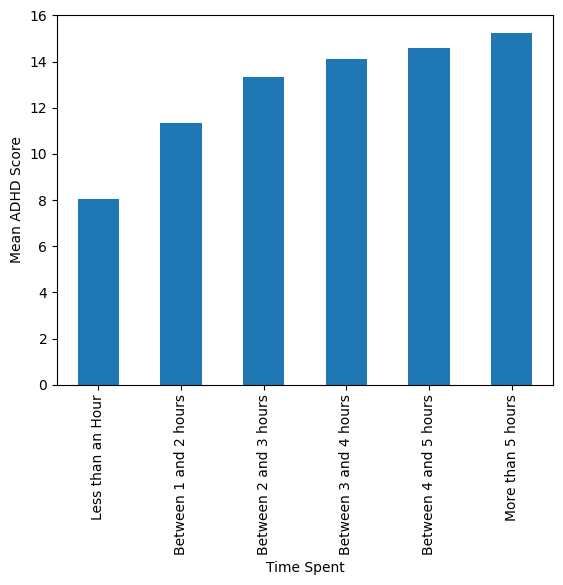

In [35]:
data.groupby('Time Spent')['ADHD Score'].mean().sort_values(ascending=True).plot.bar(ylabel='Mean ADHD Score')

<Axes: xlabel='Time Spent', ylabel='Mean Anxiety Score'>

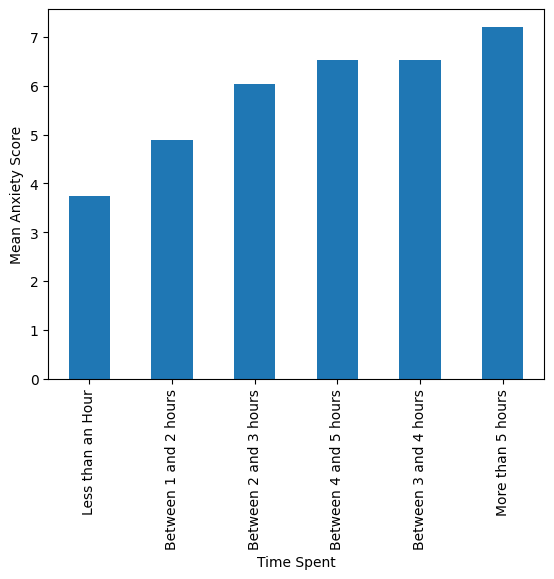

In [36]:
data.groupby('Time Spent')['Anxiety Score'].mean().sort_values(ascending=True).plot.bar(ylabel='Mean Anxiety Score')


<Axes: xlabel='Time Spent', ylabel='Mean Self Esteem Score'>

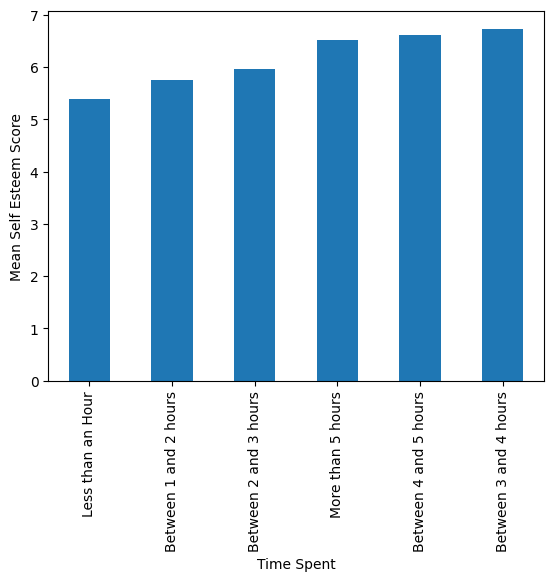

In [37]:
data.groupby('Time Spent')['Self Esteem Score'].mean().sort_values(ascending=True).plot.bar(ylabel='Mean Self Esteem Score')


<Axes: xlabel='Time Spent', ylabel='Mean Depression Score'>

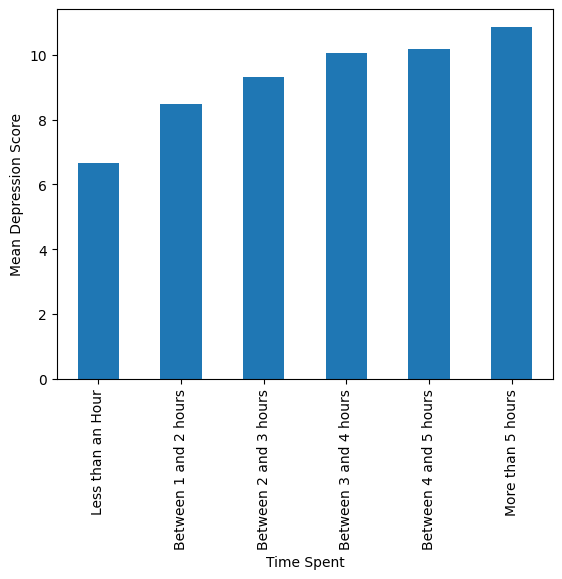

In [38]:
data.groupby('Time Spent')['Depression Score'].mean().sort_values(ascending=True).plot.bar(ylabel='Mean Depression Score')


<Axes: xlabel='Time Spent', ylabel='Total Score'>

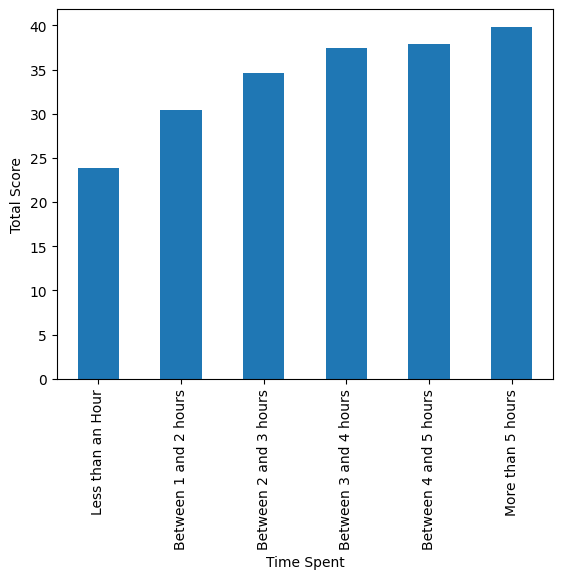

In [39]:
data.groupby('Time Spent')['Total Score'].mean().sort_values(ascending=True).plot.bar(ylabel='Total Score')


In [40]:
data.loc[data['Time Spent'] == 'Less than an Hour', 'Time Spent'] = 0
data.loc[data['Time Spent'] == 'Between 1 and 2 hours', 'Time Spent'] = 1
data.loc[data['Time Spent'] == 'Between 2 and 3 hours', 'Time Spent'] = 2
data.loc[data['Time Spent'] == 'Between 3 and 4 hours', 'Time Spent'] = 3
data.loc[data['Time Spent'] == 'Between 4 and 5 hours', 'Time Spent'] = 4
data.loc[data['Time Spent'] == 'More than 5 hours', 'Time Spent'] = 5

In [41]:
data['Time Spent'] = data['Time Spent'].astype('int64')


In [42]:
data.loc[data['Sex'] == 'Male', 'Sex'] = 0
data.loc[data['Sex'] == 'Female', 'Sex'] = 1
data.loc[data['Sex'] == 'Others', 'Sex'] = 2
data['Sex'] = data['Sex'].astype('int64')

In [43]:
data.head(5)


Age  Sex Relationship Status          Occupation Affiliations  \
0   21    0   In a relationship  University Student   University   
1   21    1              Single  University Student   University   
2   21    1              Single  University Student   University   
3   21    1              Single  University Student   University   
4   21    1              Single  University Student   University   

  Social Media User?                                     Platforms Used  \
0                Yes  Facebook, Twitter, Instagram, YouTube, Discord...   
1                Yes  Facebook, Twitter, Instagram, YouTube, Discord...   
2                Yes            Facebook, Instagram, YouTube, Pinterest   
3                Yes                                Facebook, Instagram   
4                Yes                       Facebook, Instagram, YouTube   

   Time Spent  ADHD Score  Anxiety Score  Self Esteem Score  Depression Score  \
0           2          18              4                  4                14   
1           5          15              7                 10                14   
2           3          11              6                  4                11   
3           5          12              6                 11                 9   
4           2          17              9                  6                 9   

   Total Score  Outcome  
0           40        1  
1           46        1  
2           32        0  
3           38        0  
4           41        1

**Correlation Plot and Heatmap**

In [44]:
data.drop(['Total Score'], inplace = True, axis = 1)
data.corr()

<ipython-input-44-82ed7754f7d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


Age       Sex  Time Spent  ADHD Score  Anxiety Score  \
Age                1.000000 -0.134974   -0.361333   -0.301063      -0.253629   
Sex               -0.134974  1.000000    0.215704    0.102384       0.150707   
Time Spent        -0.361333  0.215704    1.000000    0.453670       0.443020   
ADHD Score        -0.301063  0.102384    0.453670    1.000000       0.676207   
Anxiety Score     -0.253629  0.150707    0.443020    0.676207       1.000000   
Self Esteem Score -0.072147  0.127576    0.130091    0.280042       0.340021   
Depression Score  -0.304066  0.102340    0.346333    0.621464       0.580797   
Outcome           -0.189515  0.116448    0.345216    0.645753       0.615793   

                   Self Esteem Score  Depression Score   Outcome  
Age                        -0.072147         -0.304066 -0.189515  
Sex                         0.127576          0.102340  0.116448  
Time Spent                  0.130091          0.346333  0.345216  
ADHD Score                  0.280042          0.621464  0.645753  
Anxiety Score               0.340021          0.580797  0.615793  
Self Esteem Score           1.000000          0.332410  0.520263  
Depression Score            0.332410          1.000000  0.659422  
Outcome                     0.520263          0.659422  1.000000

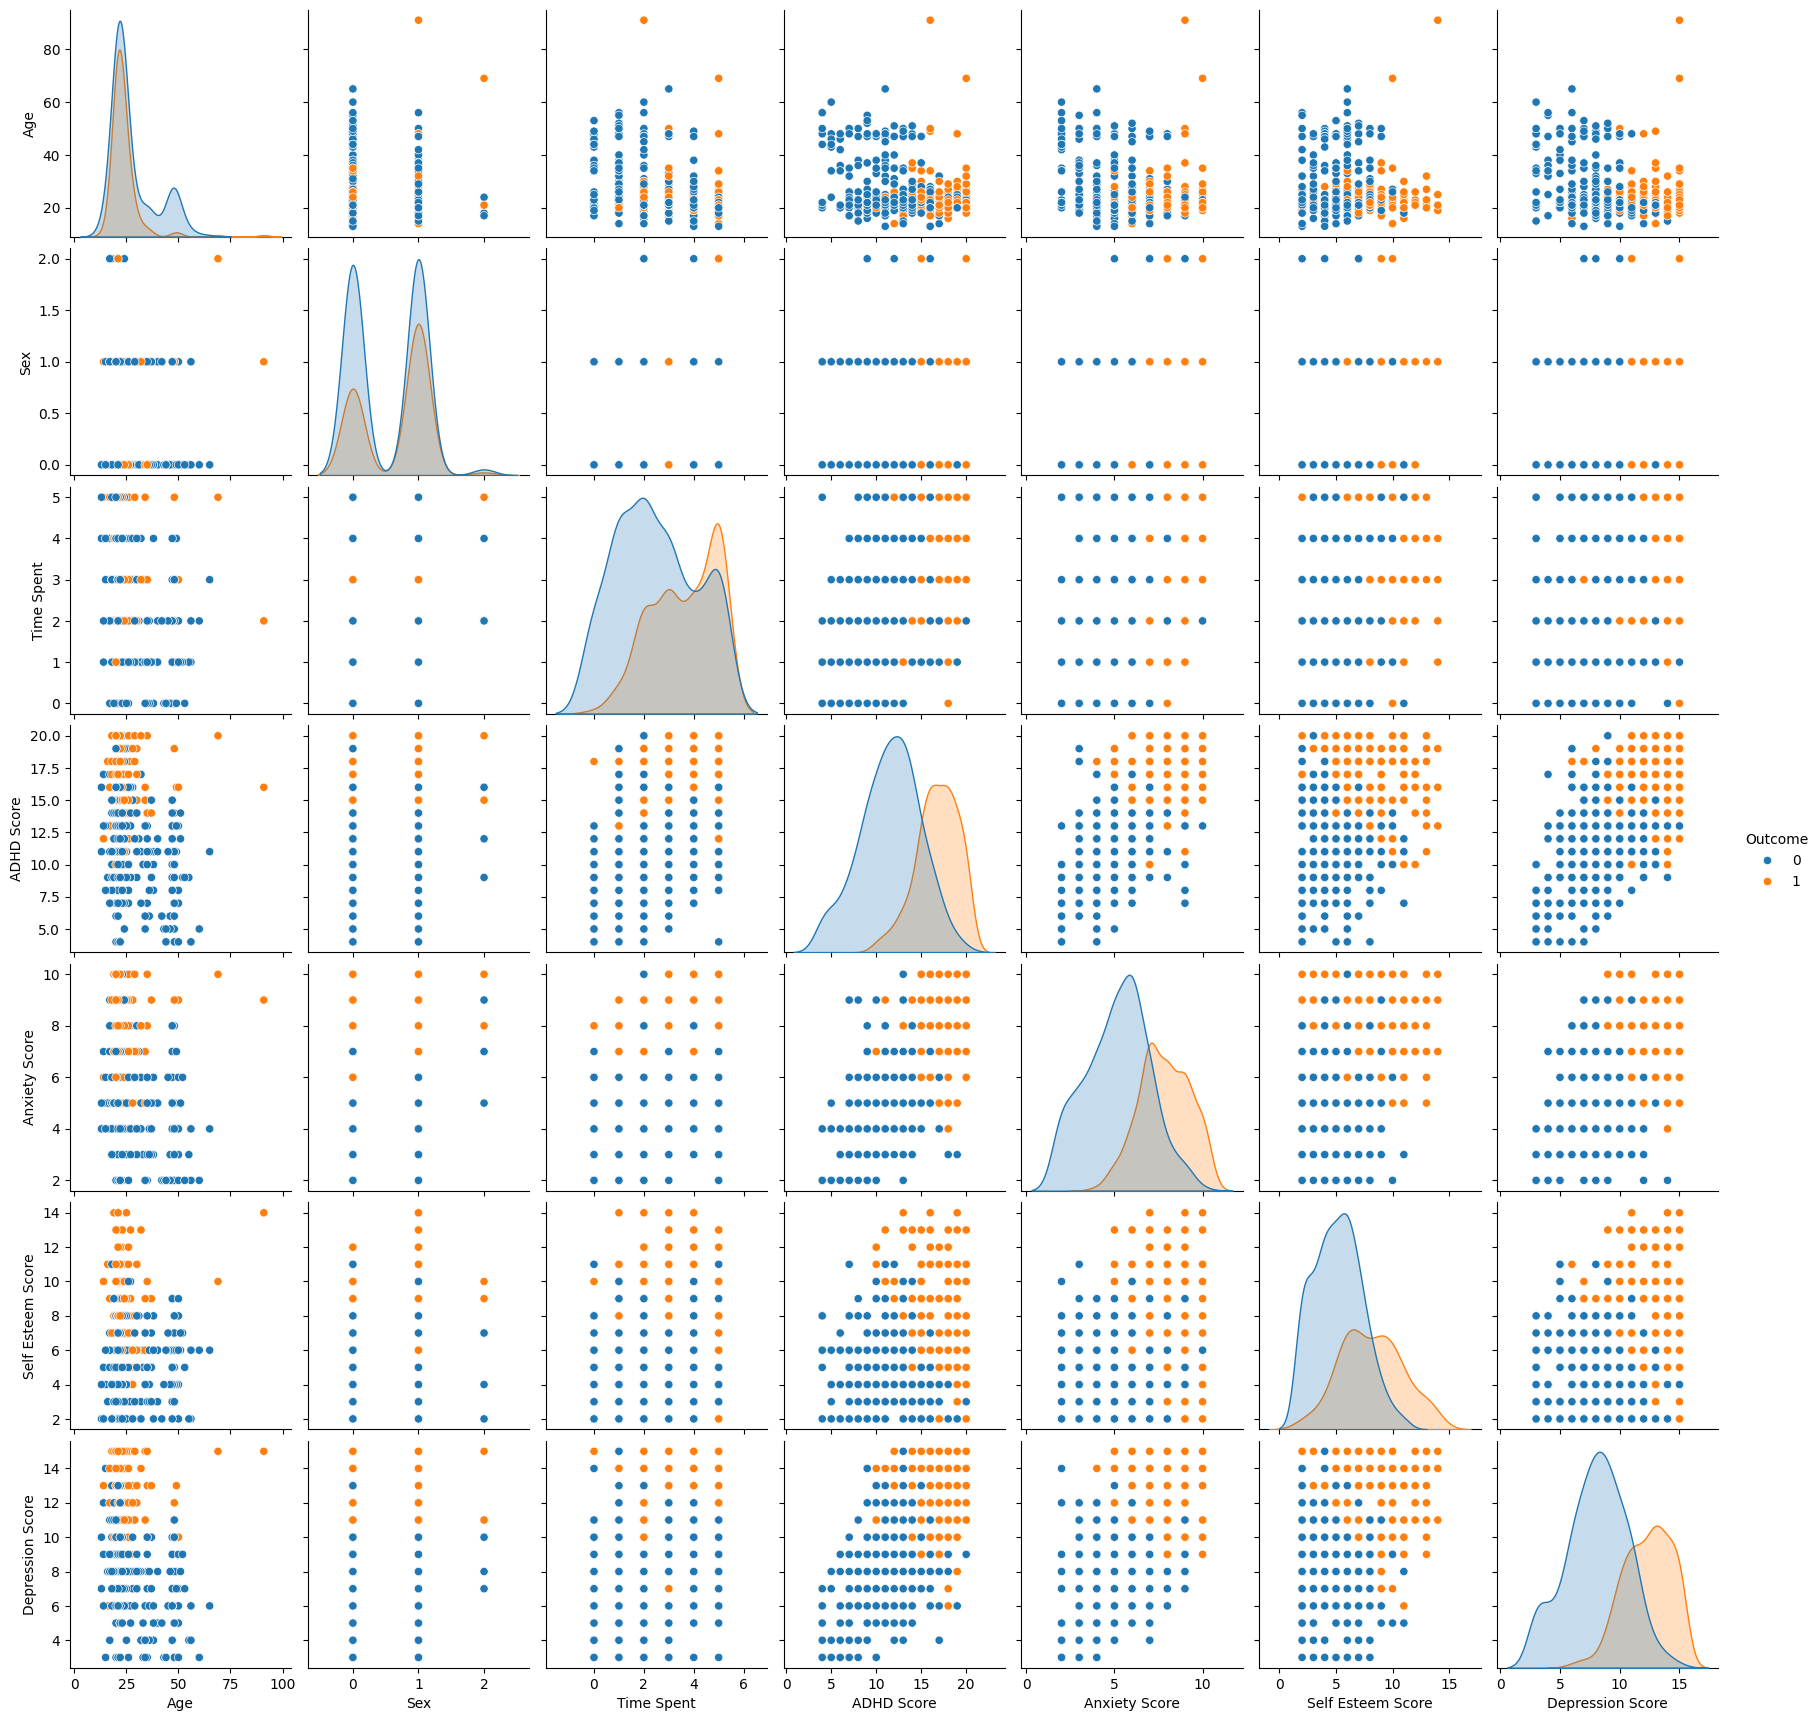

In [45]:
sns.pairplot(data,hue='Outcome',diag_kind='kde')


<ipython-input-46-7ef05a6493c2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr("pearson")


<Axes: >

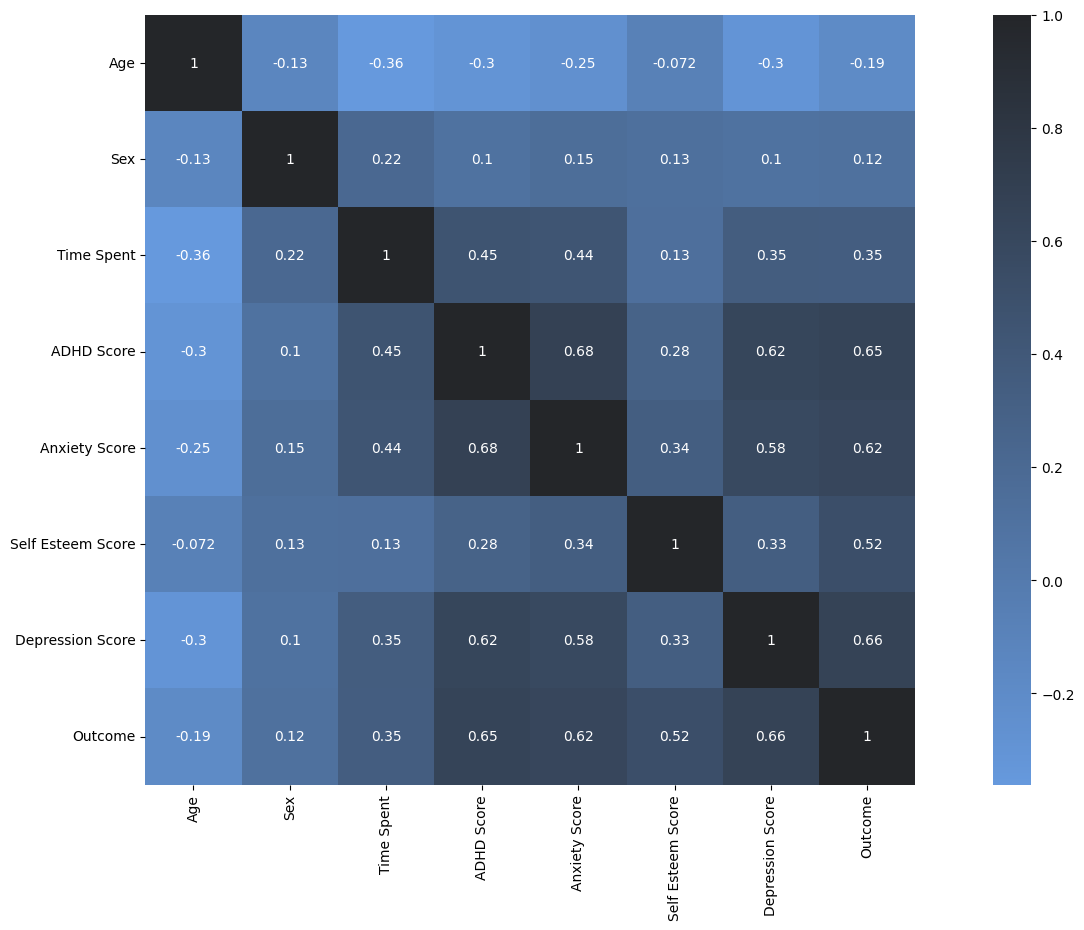

In [46]:
f, ax = plt.subplots(figsize=(20, 10))
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
            square=True, ax=ax,annot=True)

**Dropping columns**

In [47]:
data.drop(data.iloc[:, 2:7], inplace = True, axis = 1)


In [48]:
data.head()


Age  Sex  Time Spent  ADHD Score  Anxiety Score  Self Esteem Score  \
0   21    0           2          18              4                  4   
1   21    1           5          15              7                 10   
2   21    1           3          11              6                  4   
3   21    1           5          12              6                 11   
4   21    1           2          17              9                  6   

   Depression Score  Outcome  
0                14        1  
1                14        1  
2                11        0  
3                 9        0  
4                 9        1

In [49]:
X=data

In [50]:
# X['solicitude']= X['ADHD Score']+X['Anxiety Score']

In [51]:
# X.head()

In [52]:
X = data.drop(['Outcome'], axis = 1)
y = data['Outcome']

**Outlier Detection**

<Axes: xlabel='Outcome', ylabel='Count'>

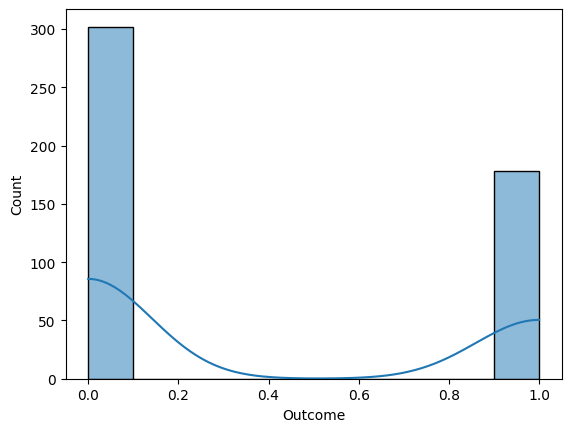

In [53]:
sns.histplot(data['Outcome'],kde=True)

In [54]:
mean_value=data['Outcome'].mean()
mean_value

0.37083333333333335

In [55]:
std_value=data['Outcome'].std()
std_value

0.4835318623778437

In [56]:
std_3=mean_value + (3*std_value)
std_3

1.8214289204668643

In [57]:
neg_std_3=mean_value-(3*std_value)
neg_std_3

-1.0797622538001976

In [58]:
data[data['Outcome']>std_3]

Empty DataFrame
Columns: [Age, Sex, Time Spent, ADHD Score, Anxiety Score, Self Esteem Score, Depression Score, Outcome]
Index: []

In [59]:
data[data['Outcome']<neg_std_3]

Empty DataFrame
Columns: [Age, Sex, Time Spent, ADHD Score, Anxiety Score, Self Esteem Score, Depression Score, Outcome]
Index: []

**Using Imbalance Technique**

In [60]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# smote=SMOTE()
# Counter = Counter (y)
# print('Before Oversampling',Counter)
# X,y = smote.fit_resample(X,y)
# print('After Oversampling',Counter)



In [61]:
# from imblearn.combine import SMOTETomek
# from collections import Counter
# smk=SMOTETomek()
# Counter = Counter (y)
# print('Before Oversampling',Counter)
# X,y=smk.fit_resample(X,y)
# print('After Oversampling',Counter)


In [62]:
# from imblearn.under_sampling import NearMiss
# nm = NearMiss()
# from collections import Counter
# Counter = Counter(y)
# print('Before Oversampling',Counter)
# X,y = nm.fit_resample(X,y)
# print('After Oversampling',Counter)

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=27)

In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [66]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
predicted=knn.predict(X_test)
accuracy=knn.score(X_test,y_test)
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,predicted)
print(cm)



[[89  6]
 [ 5 44]]


In [68]:
print("predected values using KNeighborsClassifier",predicted)

predected values using KNeighborsClassifier [1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1]


In [69]:
print("Accuracy of KNeighborsClassifier Model: ",metrics.accuracy_score(y_test, predicted))

Accuracy of KNeighborsClassifier Model:  0.9236111111111112


In [70]:
print("Accuracy sccore using the KNeighborsClassifier Model:",accuracy*100,'%')

Accuracy sccore using the KNeighborsClassifier Model: 92.36111111111111 %


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        95
           1       0.88      0.90      0.89        49

    accuracy                           0.92       144
   macro avg       0.91      0.92      0.92       144
weighted avg       0.92      0.92      0.92       144



**RF**

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
predicted= rf.predict(X_test)
accuracy= rf.score(X_test,y_test)
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[91  4]
 [ 5 44]]


In [75]:
print("predected values using RandomForestClassifier",predicted)

predected values using RandomForestClassifier [1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1]


In [76]:
print("Accuracy of RandomForestClassifier Model:",metrics.accuracy_score(y_test,predicted))

Accuracy of RandomForestClassifier Model: 0.9375


In [77]:
print("Accuracy score using the RandomForestClassifier Model:",accuracy*100,'%')

Accuracy score using the RandomForestClassifier Model: 93.75 %


In [78]:
rf_clf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_features=2)

In [79]:
y_pred = rf_clf.predict(X_test)


In [80]:
print(classification_report(y_pred, y_test))



              precision    recall  f1-score   support

           0       0.95      0.96      0.95        94
           1       0.92      0.90      0.91        50

    accuracy                           0.94       144
   macro avg       0.93      0.93      0.93       144
weighted avg       0.94      0.94      0.94       144



**Shap**

In [81]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 9.0 MB/s eta 0:00:00


In [82]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf_clf)

shap_values = explainer.shap_values(X_test)

Variable Importance Plot - Global Interpretation


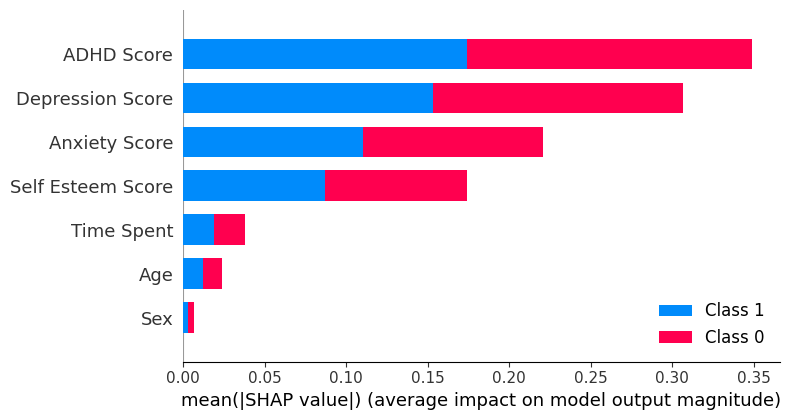

In [83]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

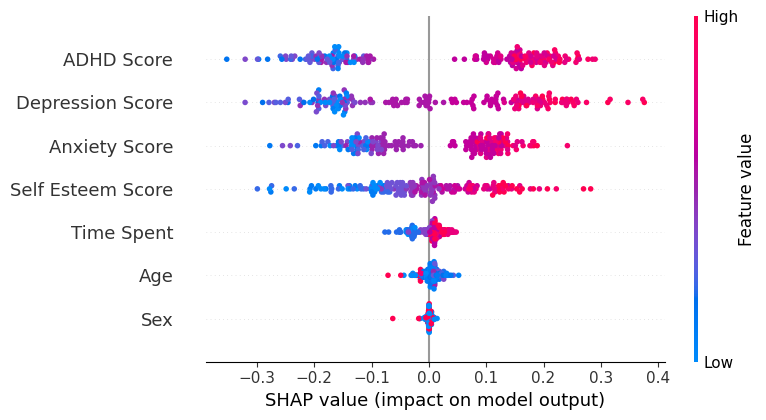

In [84]:
shap.summary_plot(shap_values[1], X_test)

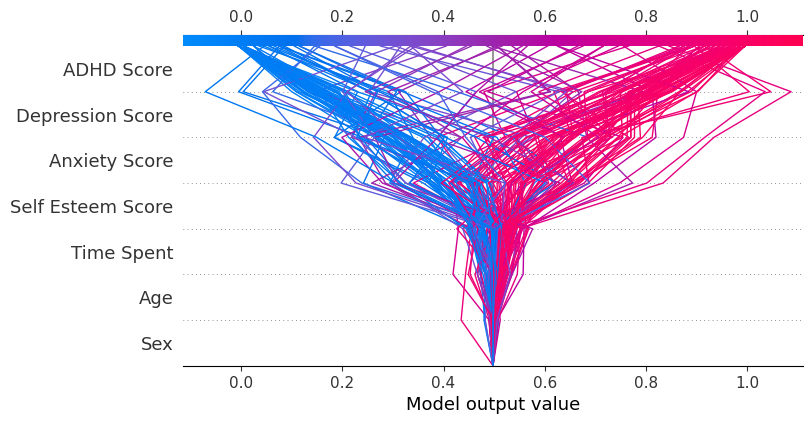

In [85]:
shap.decision_plot(explainer.expected_value[0], shap_values[1],X_test)

In [86]:
!pip install jupyterlab=4 nodejs=18 git copier=7 jinja2-time

ERROR: Invalid requirement: 'jupyterlab=4'
Hint: = is not a valid operator. Did you mean == ?


In [87]:
# shap.dependence_plot(5, shap_values, X_train, feature_names=features)

shap.force_plot(explainer.expected_value[0], shap_values[1], X_test)


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94        92
           1       0.91      0.99      0.95        87

    accuracy                           0.94       179
   macro avg       0.95      0.95      0.94       179
weighted avg       0.95      0.94      0.94       179



**DT Algorithm**

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [90]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [91]:
predicted= dt.predict(X_test)
accuracy= dt.score(X_test,y_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[76 16]
 [ 3 84]]


In [92]:
print("Accuracy of DecisionTreeClassifier Model:",metrics.accuracy_score(y_test,predicted))

Accuracy of DecisionTreeClassifier Model: 0.8938547486033519


In [93]:
print("Accuracy score of DecisionTreeClassifier Model:",accuracy*100,'%')

Accuracy score of DecisionTreeClassifier Model: 89.3854748603352 %


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        92
           1       0.84      0.97      0.90        87

    accuracy                           0.89       179
   macro avg       0.90      0.90      0.89       179
weighted avg       0.90      0.89      0.89       179



** SVM Algorithm**

In [95]:
from sklearn.svm import SVC
svm = SVC()

In [96]:
svm.fit(X_train,y_train)

SVC()

In [97]:
predicted= svm.predict(X_test)
accuracy= svm.score(X_test,y_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[79 13]
 [ 4 83]]


In [98]:
print("Predicted Values using SVC: ", predicted)

Predicted Values using SVC:  [1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0
 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0
 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0]


In [99]:
print("Accuracy of using SVC: ", metrics.accuracy_score(y_test, predicted))

Accuracy of using SVC:  0.9050279329608939


In [100]:
print('Accuracy score using the SVM model: ', accuracy*100,'%')

Accuracy score using the SVM model:  90.5027932960894 %


In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        92
           1       0.86      0.95      0.91        87

    accuracy                           0.91       179
   macro avg       0.91      0.91      0.90       179
weighted avg       0.91      0.91      0.90       179



** LR Algorithm**

In [102]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [103]:
model.fit(X_train, y_train)

LogisticRegression()

In [104]:
predicted= model.predict(X_test)
accuracy= model.score(X_test,y_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[88  4]
 [ 6 81]]


In [105]:
print("Predicted Values using Logistic Regression: ", predicted)

Predicted Values using Logistic Regression:  [1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0
 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0
 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0]


In [106]:
print("Accuracy of Logistic Regression: ",metrics.accuracy_score(y_test, predicted))

Accuracy of Logistic Regression:  0.9441340782122905


In [107]:
print('Accuracy score using the Logistic regression model: ', accuracy*100,'%')

Accuracy score using the Logistic regression model:  94.41340782122904 %


In [108]:
fig=px.scatter_3d(X,y)
fig.show()

In [109]:
model=LogisticRegression()
model.fit(X_train, y_train)
# max_features=2, n_estimators =100 ,bootstrap = True

LogisticRegression()

In [110]:
y_pred = model.predict(X_test)


In [111]:
print(classification_report(y_pred, y_test))



              precision    recall  f1-score   support

           0       0.96      0.94      0.95        94
           1       0.93      0.95      0.94        85

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179



In [112]:
!pip install shap

In [113]:
!pip install shap[lightgbm]

In [114]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf_clf)

shap_values = explainer.shap_values(X_test)

Variable Importance Plot - Global Interpretation


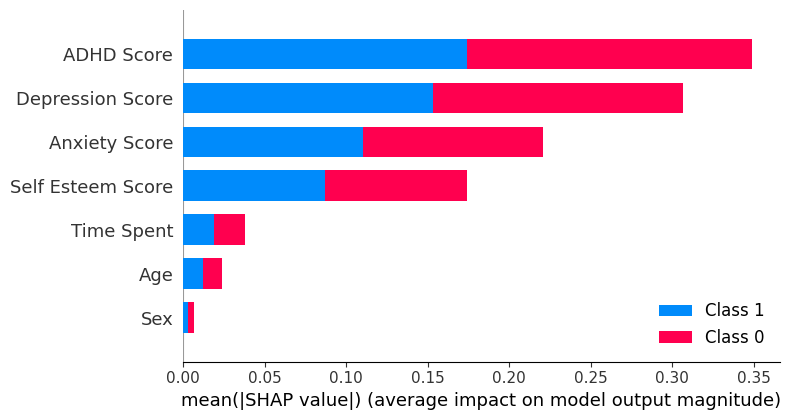

In [115]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

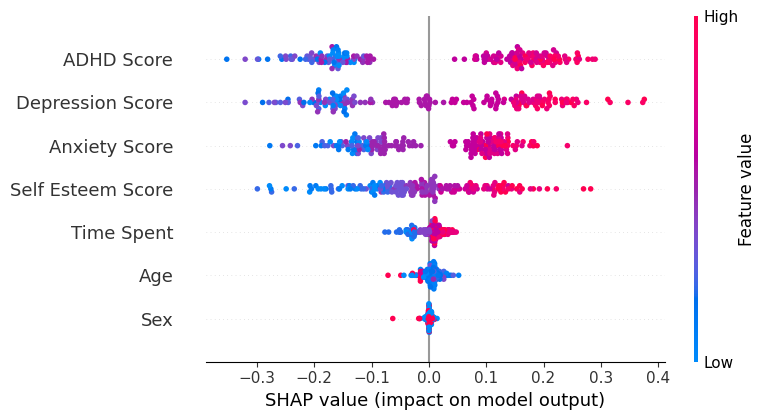

In [116]:
shap.summary_plot(shap_values[1], X_test)

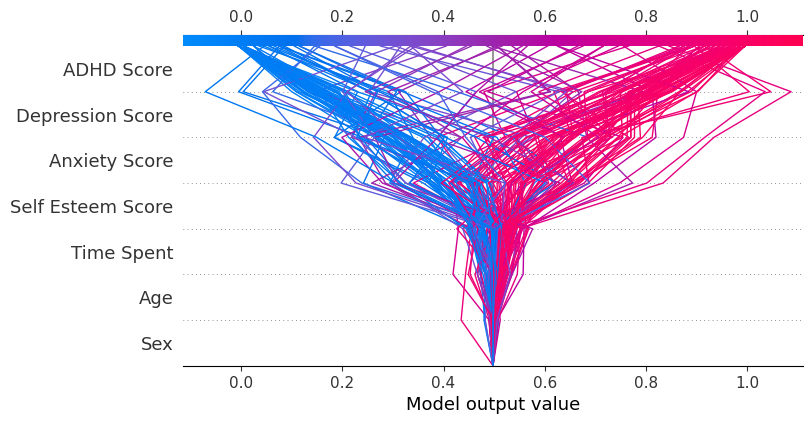

In [117]:
shap.decision_plot(explainer.expected_value[0], shap_values[1],X_test)

**ELI5**

In [118]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=a97824b564345705cf2b930a8038cb2d56bd03ac6b25919ca67719c235d63bed
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [119]:
import eli5

In [120]:
data.columns

Index(['Age', 'Sex', 'Time Spent', 'ADHD Score', 'Anxiety Score',
       'Self Esteem Score', 'Depression Score', 'Outcome'],
      dtype='object')

In [121]:
feature_names =['Age','Sex', 'Time Spent', 'ADHD Score', 'Anxiety Score',
       'Self Esteem Score', 'Depression Score',]

In [122]:
class_names=y.unique()

In [123]:
eli5.show_weights(model)

In [124]:
eli5.show_weights(model,feature_names=feature_names,target_names=class_names)

**shapash**

In [125]:
pip install shapash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 651.8/651.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 27.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.7 MB/s eta 0:00:00
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013920 sha256=0230a8ae419c7f18a9cda5ba3067a4595fb1794f80690d1ad973c3b146fa3adb
  Stored in directory: /root/.cache/pip/wheels/6c/04/c8/22a0b5a26c3ecb61e17a27d4bbe7fad32d1417bbdbd4d46acf
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669691 sha256=8750f7b77994a83ddd5fbef4651b878e55e81b6a848c20776c0517a443df84e5
 

In [126]:
from shapash.explainer.smart_explainer import SmartExplainer



In [127]:
Sexplainer = SmartExplainer(model)#passing the model for declaration

Sexplainer.compile(x=X_test) #passing created test data set

INFO: Shap explainer type - <shap.explainers._exact.ExactExplainer object at 0x7c2219187550>


In [128]:
Sexplainer.plot.local_plot(index=10)



In [129]:
Sexplainer.plot.features_importance()



LIME

In [130]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=03f095b0bd509efea4ff2d79a514cb8c88282d5e24da8d1a97854826f0574423
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [131]:
data.columns

Index(['Age', 'Sex', 'Time Spent', 'ADHD Score', 'Anxiety Score',
       'Self Esteem Score', 'Depression Score', 'Outcome'],
      dtype='object')

In [132]:
feature_names=['Age', 'Sex', 'Time Spent', 'ADHD Score', 'Anxiety Score',
       'Self Esteem Score', 'Depression Score']

In [133]:
# X

In [134]:
y=data['Outcome']

In [135]:
class_names=y.unique()

In [136]:
y_pred = model.predict(X_test)


In [137]:
# # Import the LimeTabularExplainer module
# from lime.lime_tabular import LimeTabularExplainer

# # Get the class names
# class_names = ['0', '1']

# # Get the feature names
# feature_names = list(X_train.columns)

# # Fit the Explainer on the training data set using the LimeTabularExplainer
# explainer = LimeTabularExplainer(X_train.values, feature_names =
#                                  feature_names,
#                                  class_names = class_names,
#                                  mode = 'classification')

In [138]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer


In [139]:
import lime
import lime.lime_tabular

In [140]:
feature_names=['Age', 'Sex', 'Time Spent', 'ADHD Score', 'Anxiety Score',
       'Self Esteem Score', 'Depression Score']

In [141]:
class_names=y.unique()
class_names

array([1, 0])

In [142]:
X_train.values

array([[45,  0,  2, ...,  6,  7,  6],
       [20,  1,  3, ...,  9,  9, 11],
       [37,  1,  1, ...,  4,  3, 10],
       ...,
       [22,  1,  2, ...,  8,  7, 12],
       [21,  1,  4, ...,  7,  5, 14],
       [34,  0,  1, ...,  7,  4,  6]])

In [143]:
y_pred = model.predict(X_test)


In [144]:
exp=np.array(X_test.iloc[7]).reshape(1,-1)
exp

array([[48,  0,  1,  7,  2,  3,  5]])

In [145]:
model.predict(exp)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([0])

In [146]:
 explainer = LimeTabularExplainer(X_train.values, feature_names =
                                 feature_names,
                                 class_names = ['0','1'],
                                 mode = 'classification')

In [147]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[7],
    predict_fn=model.predict_proba,
    labels=[0, 1],
    num_features=7,
    top_labels=1
)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [148]:
exp.show_in_notebook(show_table=True,show_all=False)

In [149]:
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# dt_clf = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2)
# dt_clf.fit(X_train, y_train)

# # Predict on the test data and evaluate the model
# y_pred = dt_clf.predict(X_test)

# print(classification_report(y_pred, y_test))

In [150]:
# fig = plt.figure(figsize=(25,20))
# _ = plot_tree(dt_clf,
#                	feature_names = feature_names,
#                	class_names = class_names,
#                	filled=True)

In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        92
           1       0.95      0.93      0.94        87

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179



In [152]:
from sklearn.naive_bayes import GaussianNB

In [153]:
modelNB = GaussianNB()

In [154]:
modelNB.fit(X_train, y_train)


GaussianNB()

In [155]:
predicted= modelNB.predict(X_test)
accuracy= modelNB.score(X_test,y_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[72 20]
 [ 3 84]]


In [156]:
print("Predicted Values using Gaussian Naive Bayes Model: ", predicted)

Predicted Values using Gaussian Naive Bayes Model:  [1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0
 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0
 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0]


In [157]:
print("Accuracy of Gaussian Naive Bayes Model: ",metrics.accuracy_score(y_test, predicted))

Accuracy of Gaussian Naive Bayes Model:  0.8715083798882681


In [158]:
print('Accuracy score using the Gaussian Naive Bayes Model: ', accuracy*100,'%')

Accuracy score using the Gaussian Naive Bayes Model:  87.15083798882681 %


In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        92
           1       0.81      0.97      0.88        87

    accuracy                           0.87       179
   macro avg       0.88      0.87      0.87       179
weighted avg       0.89      0.87      0.87       179



In [160]:
import xgboost as xgb


In [161]:
modelxgb = xgb.XGBClassifier()

In [162]:
modelxgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [163]:
predicted=modelxgb.predict(X_test)
accuracy=modelxgb.score(X_test,y_test)
cm=metrics.confusion_matrix(y_test,predicted)
print(cm)

[[81 11]
 [ 2 85]]


In [164]:
print('predicted valus using XGBClassifier Model:',predicted)

predicted valus using XGBClassifier Model: [1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0
 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0]


In [165]:
print("Accuracy of XGBClassifier Model: ",metrics.accuracy_score(y_test, predicted))

Accuracy of XGBClassifier Model:  0.9273743016759777


In [166]:
print("Accuracy of XGBClassifier Model: ",accuracy*100,'%')

Accuracy of XGBClassifier Model:  92.73743016759776 %


In [167]:
from sklearn.metrics import classification_report

In [168]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        92
           1       0.89      0.98      0.93        87

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179



In [169]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot the ROC curves given the models
def plot_roc(arr_models, arr_str_model_labels):
    plt.plot([0, 1], [0, 1], 'k--')   # Reference line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC Curves for Multiple Classifiers without preprocessing")
    for model, str_label in zip(arr_models, arr_str_model_labels):
        arr_predicted_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, arr_predicted_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label="%s " % (str_label))
    plt.legend(loc="lower right")
    plt.show()

In [170]:
svm.set_params(probability=False)

svm.get_params()
svm.set_params(probability=True)


SVC(probability=True)

In [171]:
r_probs=[0 for _ in range(len(y_test))]
modelNB_probs=modelNB.predict_proba(X_test)
model_probs=model.predict_proba(X_test)
knn_probs=knn.predict_proba(X_test)
# svm_probs=svm.predict_proba(X_test)
rf_probs=rf.predict_proba(X_test)
dt_probs=dt.predict_proba(X_test)
modelxgb_probs=modelxgb.predict_proba(X_test)


In [172]:
r_probs=[0 for _ in range(len(y_test))]
modelNB_probs=modelNB_probs[:,1]
model_probs=model_probs[:,1]
knn_probs=knn_probs[:,1]
# svm_probs=svm_probs[:,1]
rf_probs=rf_probs[:,1]
dt_probs=dt_probs[:,1]
modelxgb_probs=modelxgb_probs[:,1]


In [173]:
modelNB_auc=roc_auc_score(y_test, modelNB_probs)
model_auc=roc_auc_score(y_test, model_probs)
knn_auc=roc_auc_score(y_test, knn_probs)
rf_auc=roc_auc_score(y_test, rf_probs)
dt_auc=roc_auc_score(y_test, dt_probs)
modelxgb_auc=roc_auc_score(y_test, modelxgb_probs)


In [174]:
print("Accuracy of Logistic Regression:model AUROC ",accuracy*100,'%')
print('Accuracy score using the SVM model:svm AUROC ', accuracy*100,'%')

Accuracy of Logistic Regression:model AUROC  92.73743016759776 %
Accuracy score using the SVM model:svm AUROC  92.73743016759776 %


predicting the test set results

In [175]:
modelNB_fpr,modelNB_tpr,_= roc_curve(y_test, modelNB_probs)
model_fpr,model_tpr,_= roc_curve(y_test, model_probs)
knn_fpr,knn_tpr,_= roc_curve(y_test, knn_probs)
rf_fpr,rf_tpr,_= roc_curve(y_test, rf_probs)
dt_fpr,dt_tpr,_= roc_curve(y_test, dt_probs)
modelxgb_fpr,modelxgb_tpr,_= roc_curve(y_test, modelxgb_probs)

In [176]:
def plot_roc_curve(model_fpr, model_tpr, model_auc):
    plt.plot(model_fpr, model_tpr, color='red', label='Model AUC = %0.2f' % model_auc)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show


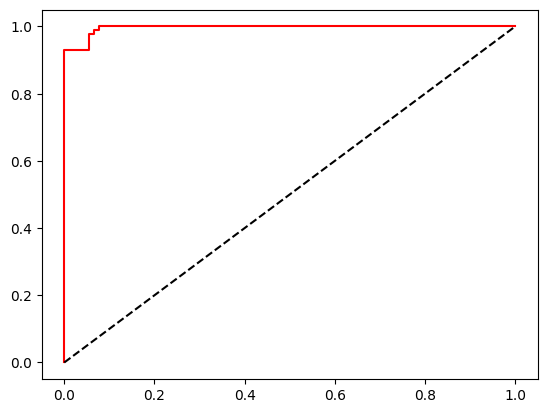

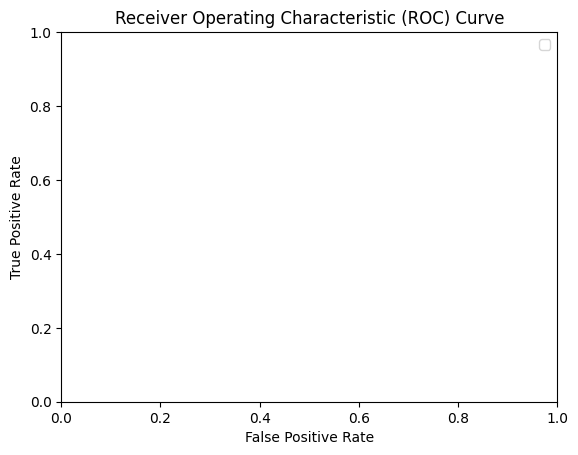

In [177]:
plot_roc_curve(model_fpr, model_tpr,model_auc)

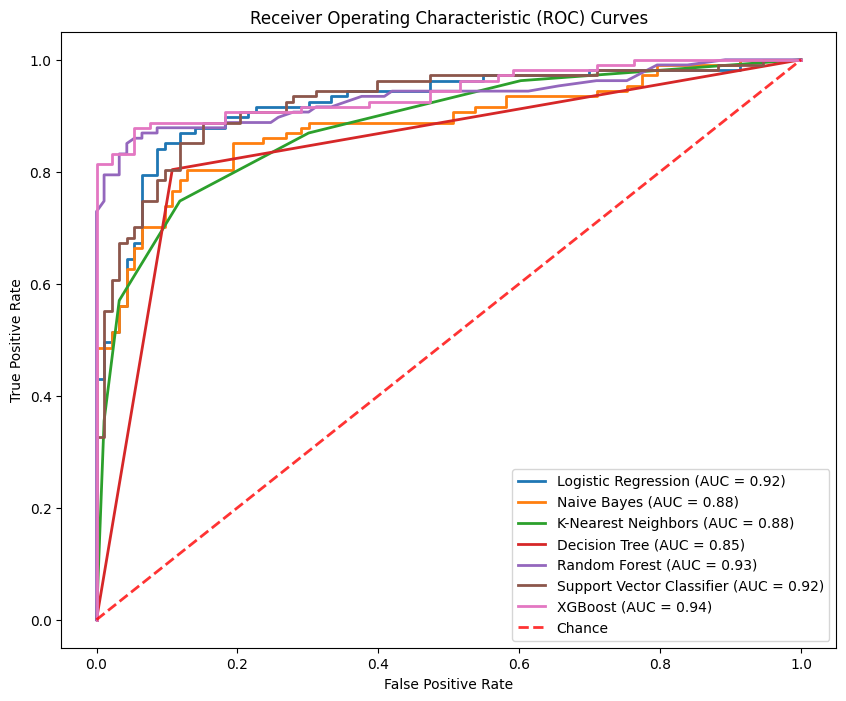

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(probability=True),
    'XGBoost': xgb.XGBClassifier()
}

# Plot ROC curve for each classifier
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    if hasattr(clf, "decision_function"):
        probas = clf.decision_function(X_test)
    else:
        probas = clf.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, probas)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (name, roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


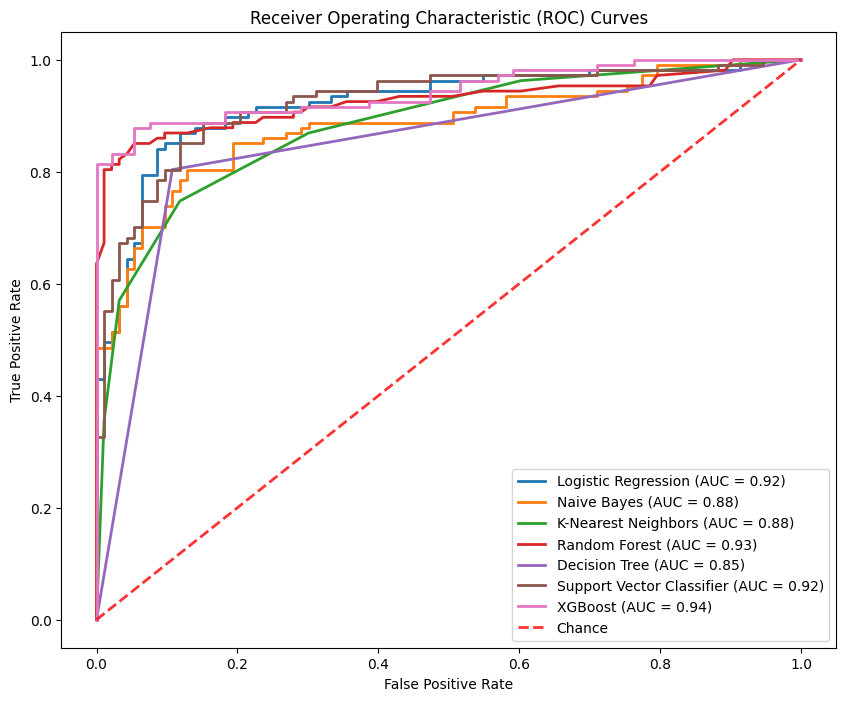

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Classifier': SVC(probability=True),
    'XGBoost': xgb.XGBClassifier()
}

# Plot ROC curve for each classifier
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        probas = clf.predict_proba(X_test)[:, 1]
    else:
        probas = clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, probas)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (name, roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()
